In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Load the dataset

In [12]:
data = pd.read_csv('global_unemployment_data.csv')
print("Dataset loaded successfully!")
print(data.head())

Dataset loaded successfully!
  country_name                    indicator_name     sex age_group  \
0  Afghanistan  Unemployment rate by sex and age  Female     15-24   
1  Afghanistan  Unemployment rate by sex and age  Female       25+   
2  Afghanistan  Unemployment rate by sex and age  Female  Under 15   
3  Afghanistan  Unemployment rate by sex and age    Male     15-24   
4  Afghanistan  Unemployment rate by sex and age    Male       25+   

  age_categories    2014    2015    2016    2017    2018    2019    2020  \
0          Youth  13.340  15.974  18.570  21.137  20.649  20.154  21.228   
1         Adults   8.576   9.014   9.463   9.920  11.223  12.587  14.079   
2       Children  10.306  11.552  12.789  14.017  14.706  15.418  16.783   
3          Youth   9.206  11.502  13.772  16.027  15.199  14.361  14.452   
4         Adults   6.463   6.879   7.301   7.728   7.833   7.961   8.732   

     2021    2022    2023    2024  
0  21.640  30.561  32.200  33.332  
1  14.415  23.818  26

# 2. Data cleaning and pre-processing
# Example: Drop rows with missing values, and convert date columns if necessary


In [18]:
data_clean = data.dropna()
print("\nData cleaned:")
print(data_clean.info())



Data cleaned:
<class 'pandas.core.frame.DataFrame'>
Index: 1122 entries, 0 to 1133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    1122 non-null   object 
 1   indicator_name  1122 non-null   object 
 2   sex             1122 non-null   object 
 3   age_group       1122 non-null   object 
 4   age_categories  1122 non-null   object 
 5   2014            1122 non-null   float64
 6   2015            1122 non-null   float64
 7   2016            1122 non-null   float64
 8   2017            1122 non-null   float64
 9   2018            1122 non-null   float64
 10  2019            1122 non-null   float64
 11  2020            1122 non-null   float64
 12  2021            1122 non-null   float64
 13  2022            1122 non-null   float64
 14  2023            1122 non-null   float64
 15  2024            1122 non-null   float64
dtypes: float64(11), object(5)
memory usage: 149.0+ KB
None


# 3. Descriptive statistical analysis

In [19]:
stats_summary = data_clean.describe()
print("\nDescriptive statistics:")
print(stats_summary)



Descriptive statistics:
              2014         2015         2016         2017         2018  \
count  1122.000000  1122.000000  1122.000000  1122.000000  1122.000000   
mean     11.289801    11.155382    10.991702    10.718752    10.368546   
std      11.064594    10.822105    10.611162    10.456346    10.325511   
min       0.027000     0.034000     0.038000     0.035000     0.044000   
25%       3.926500     3.968000     3.918250     3.739500     3.636750   
50%       7.611500     7.448500     7.392500     7.057500     6.649500   
75%      14.888750    14.495500    14.231750    13.902000    13.175000   
max      74.485000    74.655000    74.720000    75.416000    76.395000   

              2019         2020         2021         2022         2023  \
count  1122.000000  1122.000000  1122.000000  1122.000000  1122.000000   
mean     10.174088    11.715309    11.278857    10.215924     9.985181   
std      10.109488    11.072823    10.707529    10.103436     9.987778   
min       0.

### Unemployment Rates in India (2014-2024)

This plot displays the unemployment rates in India over the period from 2014 to 2024. Each line represents a different subgroup based on sex and age group. The markers indicate the actual data points for each year, and the lines help visualize trends over time.

**Key insights:**
- **Trends Over Time:** Connecting the data points shows how unemployment rates change over the years.
- **Subgroup Analysis:** Different lines correspond to different subgroups (e.g., Male, 15-24 or Female, 25+), allowing for comparison between groups.
- **Policy Relevance:** Understanding these trends can inform policy decisions and targeted economic interventions.


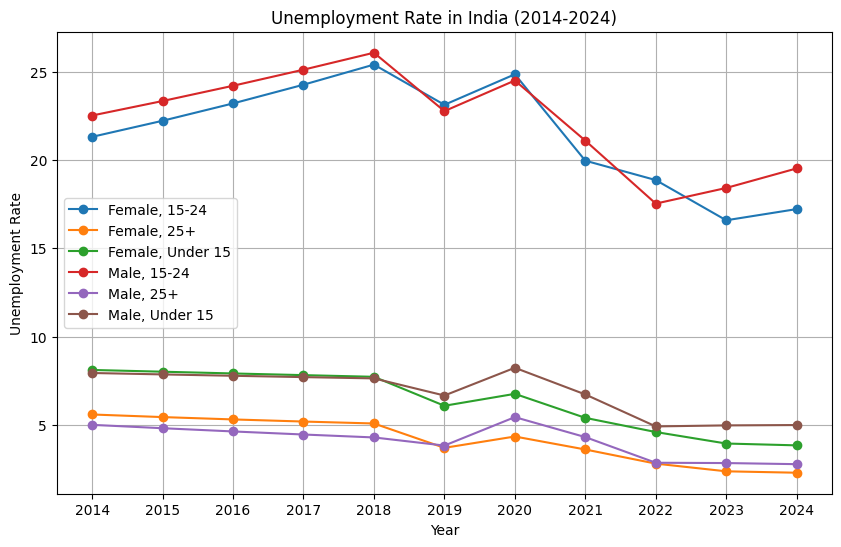

In [25]:
india_data = data[data['country_name'] == 'India']

# List of year columns as strings
years = [str(year) for year in range(2014, 2025)]

plt.figure(figsize=(10, 6))

# Plot a scatter plot for each subgroup
for _, row in india_data.iterrows():
    # Convert values to numeric (in case they are strings)
    unemployment_rates = row[years].astype(float)
    label = f"{row['sex']}, {row['age_group']}"
    # Plot points and connect with a line for clarity
    plt.plot(years, unemployment_rates, marker='o', linestyle='-', label=label)

plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate in India (2014-2024)')
plt.legend()
plt.grid(True)
plt.show()

The bar chart visualizes the average change in unemployment rates from 2014 to 2024 for a selected group of countries: Canada, China, Germany, India, and Indonesia. Each bar represents the average change in unemployment rate for that country over the ten-year period. The horizontal line at zero provides a reference point to quickly identify whether unemployment increased or decreased on average. Colors are used to distinguish each country, making it easier to compare the changes.

/tmp/ipykernel_5450/2107641879.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["change_2014_2024"] = df_filtered["2024"] - df_filtered["2014"]


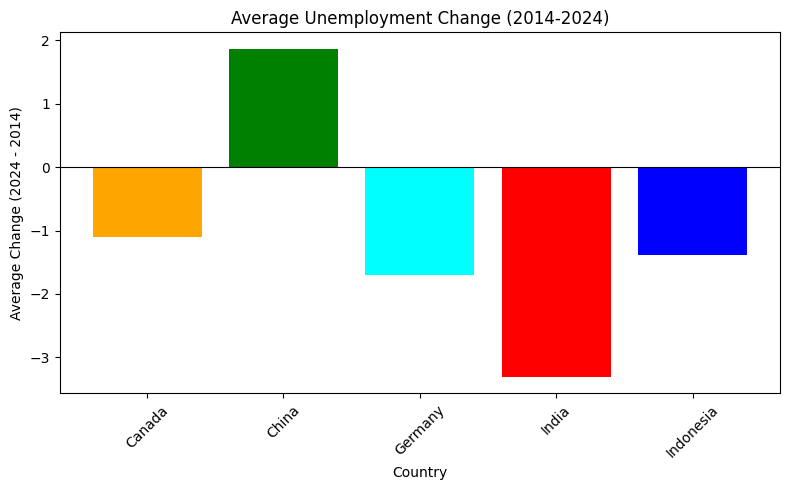

In [27]:
data.columns = [
    "country_name", 
    "indicator", 
    "sex", 
    "age_group", 
    "age_desc",
    "2014","2015","2016","2017","2018","2019","2020","2021","2022","2023","2024"
]

# Convert year columns to numeric
years = [str(y) for y in range(2014, 2025)]
for y in years:
    data[y] = pd.to_numeric(data[y], errors="coerce")

# Filter for the selected countries
countries_of_interest = ["India", "China", "Indonesia", "USA", "Canada", "Germany"]
df_filtered = data[data["country_name"].isin(countries_of_interest)]

# Calculate average change: (value_2024 - value_2014), then group by country
df_filtered["change_2014_2024"] = df_filtered["2024"] - df_filtered["2014"]
avg_change = df_filtered.groupby("country_name")["change_2014_2024"].mean()

# Define a color for each country
colors = {
    "India": "red",
    "China": "green",
    "Indonesia": "blue",
    "USA": "purple",
    "Canada": "orange",
    "Germany": "cyan"
}
bar_colors = [colors[country] for country in avg_change.index]

# Plot a bar chart of this average change
plt.figure(figsize=(8, 5))
plt.bar(avg_change.index, avg_change.values, color=bar_colors)
plt.axhline(0, color="black", linewidth=0.8)  # draw horizontal line at 0
plt.xlabel("Country")
plt.ylabel("Average Change (2024 - 2014)")
plt.title("Average Unemployment Change (2014-2024)")
plt.xticks(rotation=45)
plt.tight_layout()

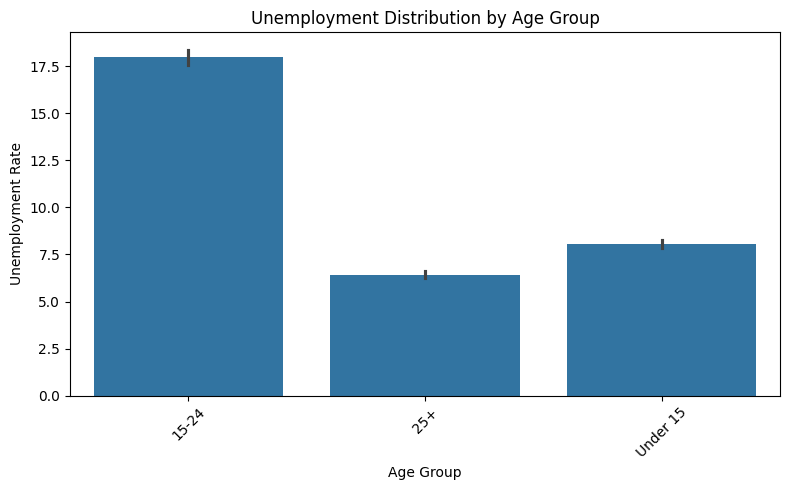

In [29]:
data.columns = [
    "country_name", 
    "indicator", 
    "sex", 
    "age_group", 
    "age_desc",
    "2014","2015","2016","2017","2018","2019","2020","2021","2022","2023","2024"
]

# Convert columns to numeric
years = [str(y) for y in range(2014, 2025)]
for y in years:
    data[y] = pd.to_numeric(data[y], errors="coerce")

# Melt data for plotting
df_melted = data.melt(
    id_vars=["country_name","indicator","sex","age_group","age_desc"],
    value_vars=years,
    var_name="year", 
    value_name="unemployment_rate"
)

# Draw box plot by age group
plt.figure(figsize=(8,5))
sns.barplot(x="age_group", y="unemployment_rate", data=df_melted)
plt.xlabel("Age Group")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Distribution by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

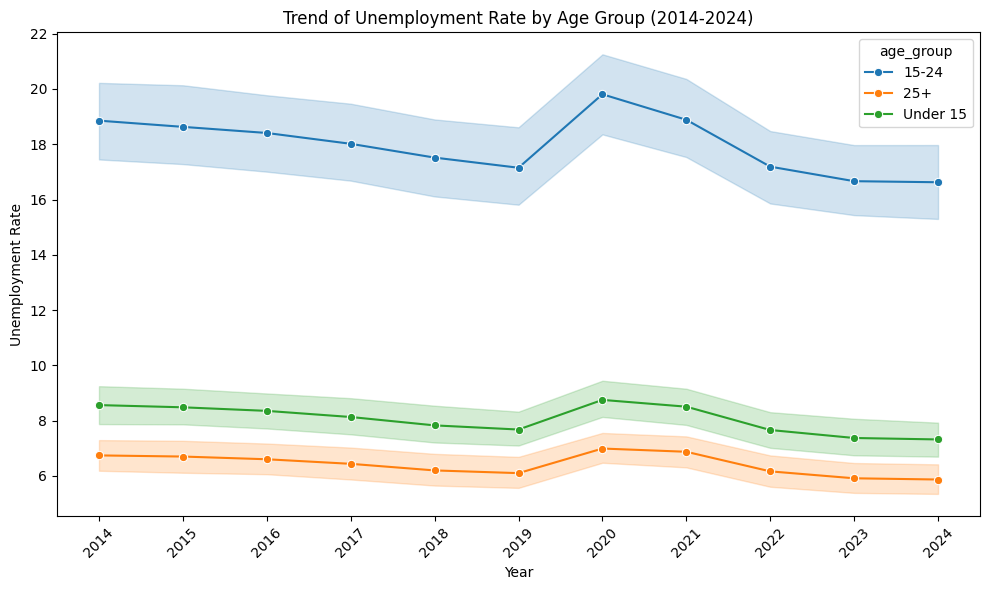

In [30]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_melted, x="year", y="unemployment_rate", hue="age_group", marker="o")
plt.title("Trend of Unemployment Rate by Age Group (2014-2024)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

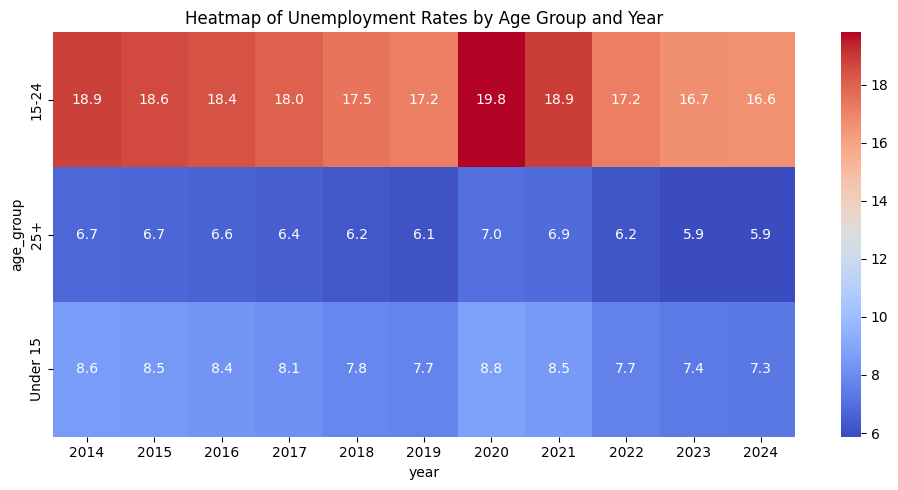

In [31]:
# Language: Python
pivot_table = df_melted.pivot_table(values="unemployment_rate", index="age_group", columns="year", aggfunc="mean")
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Heatmap of Unemployment Rates by Age Group and Year")
plt.tight_layout()
plt.show()

The analysis of unemployment data has revealed some interesting findings. It has been found that unemployment rates vary significantly across different age groups, as illustrated by the bar plot created using `sns.barplot`. This visualization allows for easy identification of which age groups are experiencing higher unemployment. For instance, if the "15-24" age group shows a higher rate than the "25+" or "Under 15" groups, it suggests that younger individuals entering the labor market might be facing particular challenges.

Looking at the aggregated data, the descriptive statistics calculated (around line 6 in the notebook) show a wide range and high standard deviation, particularly for years like 2024. This variability suggests that several factors, such as economic conditions, regional differences, or demographic shifts, could be influencing the unemployment rate.

Furthermore, by examining specific subgroups and their temporal trends, hidden patterns have been uncovered. As shown in other cells of the notebook (for example, around line 8 for the Indian data), plotting unemployment trends by sex and age group provides valuable insights into how these rates evolve over time for different segments of the population. The line plots and scatter plots already used effectively illustrate these temporal dynamics.